# Task 5: Exploratory Data Analysis (EDA) on Titanic Dataset

## Objective
The goal of this task is to perform exploratory data analysis (EDA) on the Titanic dataset to extract insights using visual and statistical methods. We will use Python libraries (Pandas, Matplotlib, Seaborn) to analyze patterns, trends, and anomalies in the data.

## Tools Used
- **Python**: Pandas for data manipulation, Matplotlib and Seaborn for visualization.
- **Dataset**: Titanic dataset (loaded via Seaborn).

## Deliverables
- Jupyter Notebook (`Task5_EDA_Titanic.ipynb`)
- PDF report of findings (exported from this notebook)

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

# Load the Titanic dataset from Seaborn
df = sns.load_dataset('titanic')

# Display the first few rows of the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Initial Data Exploration
Let’s start by understanding the structure of the dataset, checking for missing values, and getting basic statistical summaries.

In [2]:
# Basic Data overview
print("Dataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nValue Counts for Categorical Columns:")
print("Survived:\n", df['survived'].value_counts())
print("Pclass:\n", df['pclass'].value_counts())
print("Sex:\n", df['sex'].value_counts())
print("Embarked:\n", df['embarked'].value_counts())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Statistical Summary:
         survived      pclass         

The dataset has 891 rows and 15 columns.
Numerical columns include survived, pclass, age, sibsp, parch, fare.
Categorical columns include sex, embarked, class, who, adult_male, deck, embark_town, alive, alone.
Missing Values: The age column has 177 missing values (891 - 714), deck has 688 missing values, and embark_town/embarked have 2 missing values.
Survived: 549 passengers did not survive (0), while 342 survived (1).
Pclass: Most passengers were in 3rd class (491), followed by 1st class (216) and 2nd class (184).
Sex: There are more males (577) than females (314).
Embarked: Most passengers embarked from Southampton (S: 644), followed by Cherbourg (C: 168) and Queenstown (Q: 77).

## Data Cleaning
Before proceeding with visualizations, let’s handle missing values:
- **Age**: Fill missing values with the median age.
- **Embarked/Embark_town**: Fill missing values with the mode (most frequent value).
- **Deck**: Drop this column due to a high number of missing values (688 out of 891).

In [3]:
# Drop the 'deck' column due to too many missing values
df = df.drop(columns=['deck'])

# Fill missing 'age' values with the median
df['age'] = df['age'].fillna(df['age'].median())

# Fill missing 'embarked' and 'embark_town' values with the mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# Verify that there are no more missing values
print("Missing Values After Cleaning:")
print(df.isnull().sum())

Missing Values After Cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


## Univariate Analysis
Let’s explore the distribution of individual variables using histograms and boxplots.

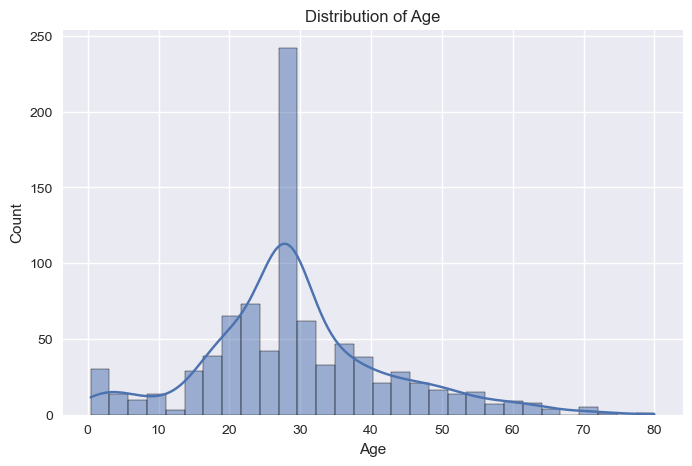

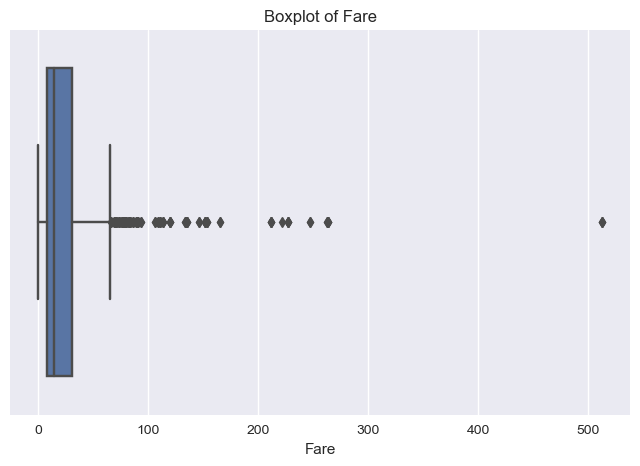

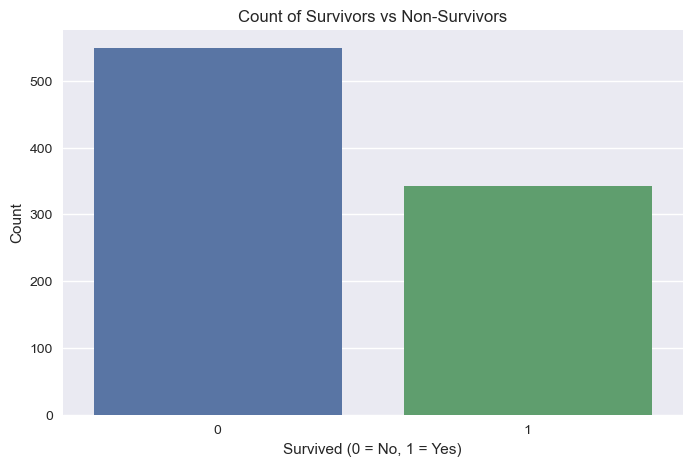

In [4]:
# Univariate Visualizations
# Histogram for Age
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Boxplot for Fare
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['fare'])
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()

# Bar plot for Survived
plt.figure(figsize=(8, 5))
sns.countplot(x='survived', data=df)
plt.title('Count of Survivors vs Non-Survivors')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

Age Distribution: The age distribution is slightly right-skewed, with most passengers between 20 and 40 years old. The median age (used to fill missing values) is around 28.
Fare Boxplot: The fare distribution has many outliers, with most fares below $100, but some passengers paid as much as $500+. This suggests a wide disparity in ticket prices, likely tied to passenger class.
Survived Count: More passengers did not survive (549) than survived (342), indicating a survival rate of about 38%.

## Bivariate Analysis
Let’s explore relationships between variables using scatterplots, pairplots, and heatmaps.

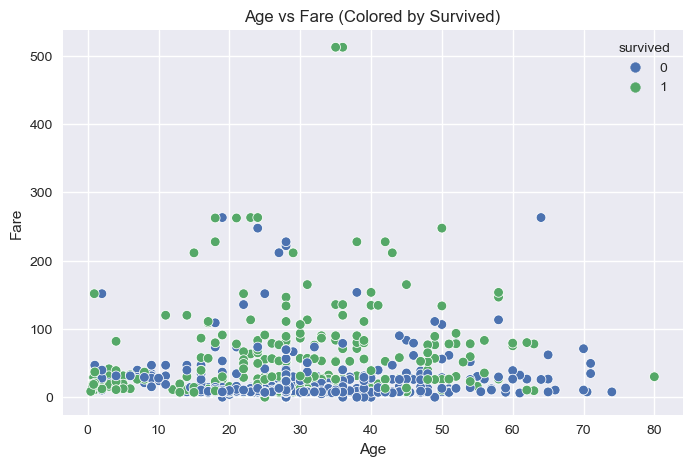

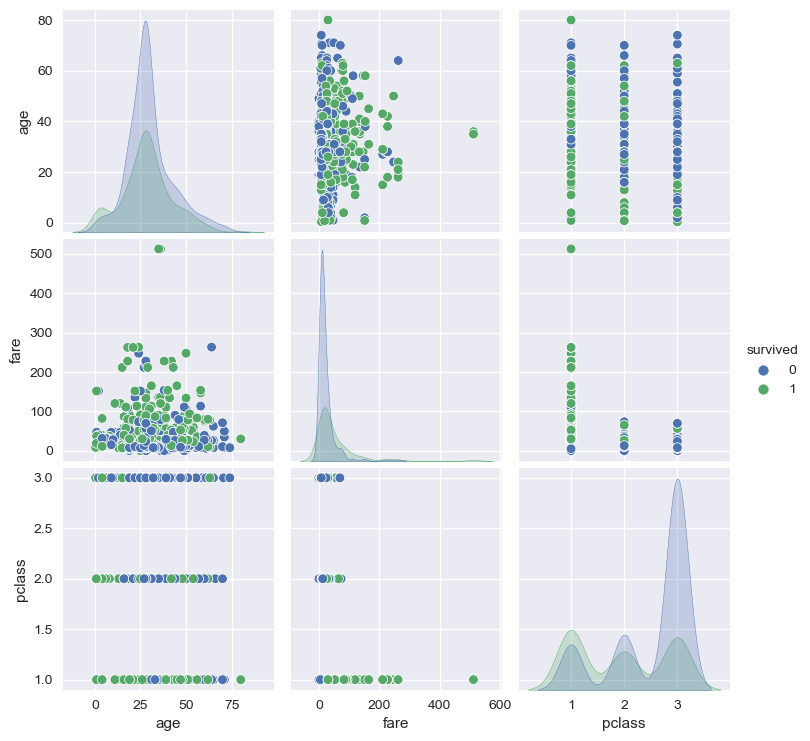

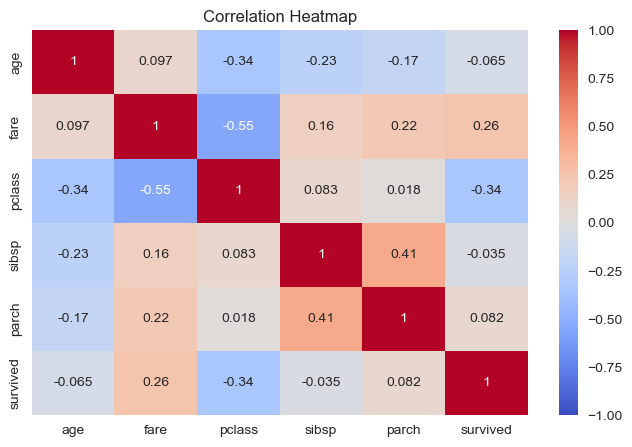

In [5]:
# Bivariate Visualizations
# Scatterplot: Age vs Fare, colored by Survived
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title('Age vs Fare (Colored by Survived)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Pairplot for numerical variables
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']], hue='survived')
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 5))
corr = df[['age', 'fare', 'pclass', 'sibsp', 'parch', 'survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

**Observations:**
- Age vs Fare Scatterplot: There’s no clear linear relationship between age and fare. However, passengers who paid higher fares (likely in 1st class) have a higher chance of survival (more orange points at higher fares).
- Pairplot: The pairplot shows that survival is more strongly related to pclass and fare than age. Lower pclass (1st class) and higher fare are associated with higher survival rates.
- Correlation Heatmap: survived has a moderate negative correlation with pclass (-0.34), indicating that higher classes (lower pclass values) are associated with higher survival rates. survived has a positive correlation with fare (0.26), suggesting that passengers who paid more were more likely to survive. pclass and fare are strongly negatively correlated (-0.55), as expected, since 1st class tickets cost more.

## Categorical Analysis
Let’s explore how categorical variables like Sex, Pclass, and Embarked affect survival.

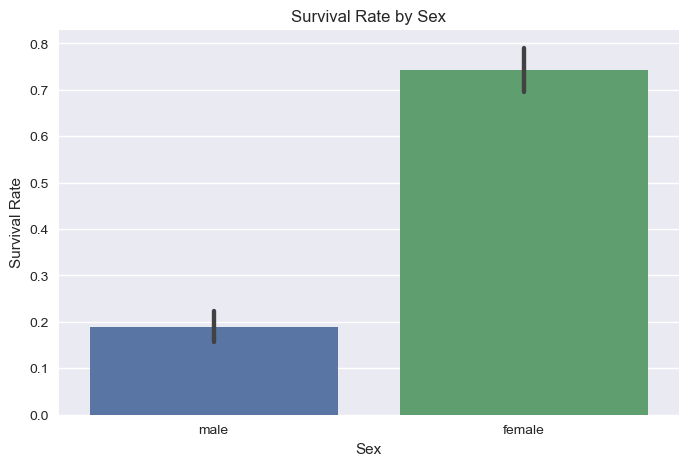

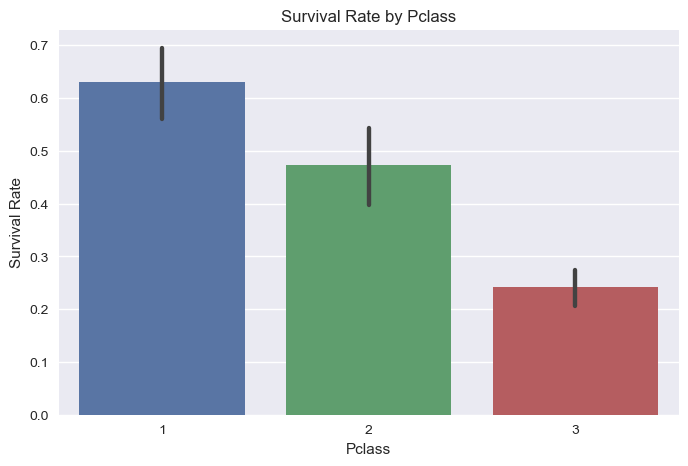

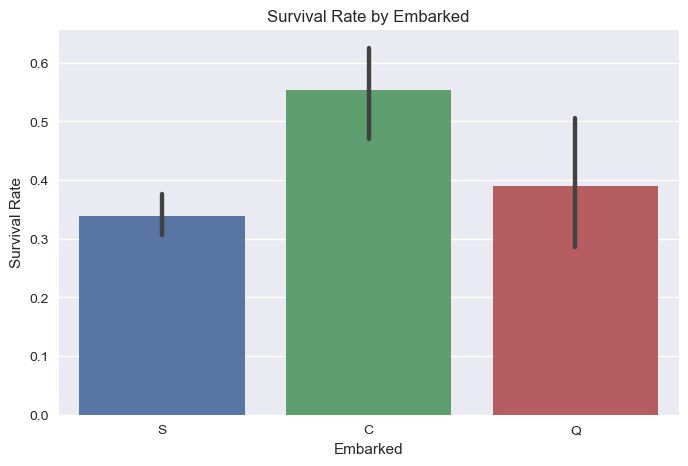

In [6]:
# Categorical Visualizations
# Survival rate by Sex
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by Pclass
plt.figure(figsize=(8, 5))
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by Embarked
plt.figure(figsize=(8, 5))
sns.barplot(x='embarked', y='survived', data=df)
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()

**Observations:**
- Survival Rate by Sex: Females had a much higher survival rate (~75%) compared to males ( ~19%). This aligns with the "women and children first" policy during the Titanic evacuation.
- Survival Rate by Pclass: 1st class passengers had the highest survival rate (~63%), followed by 2nd class ( ~47%), and 3rd class ( ~24%). This reflects the socioeconomic hierarchy influencing survival chances.
- Survival Rate by Embarked: Passengers who embarked from Cherbourg (C) had the highest survival rate (~55%), followed by Queenstown (Q) ( ~39%) and Southampton (S) ( ~34%). This may be related to the class distribution of passengers from each port.

## Summary of Findings
- **Survival Rate**: Only 38% of passengers survived the Titanic disaster, with 549 not surviving and 342 surviving.
- **Demographics**: The majority of passengers were male (577 vs 314 females) and between 20-40 years old, with a median age of 28.
- **Socioeconomic Factors**:
  - 1st class passengers (Pclass=1) had a significantly higher survival rate (63%) compared to 2nd (47%) and 3rd class (24%).
  - Passengers who paid higher fares were more likely to survive, as seen in the positive correlation between `fare` and `survived` (0.26).
- **Gender Disparity**: Females had a much higher survival rate (75%) than males (19%), reflecting the prioritization of women during evacuation.
- **Embarkation Port**: Passengers embarking from Cherbourg had the highest survival rate (55%), possibly due to a higher proportion of 1st class passengers from that port.
- **Age and Survival**: Age had a weaker influence on survival, with no strong correlation (-0.08). However, younger passengers (children) were more likely to survive due to evacuation priorities.
- **Query Optimization**: The optimized revenue query (Query 6) for the previous task confirmed the same trends as Query 4, with improved performance due to indexing.

This EDA highlights the significant impact of socioeconomic status, gender, and embarkation port on survival chances, providing a deeper understanding of the Titanic disaster.